# Machine Learning
## Assignment - 1
written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

# Classification Task

<hr>


```
Contents
1. Import All the Necessary Libraries
2. Read the train and test data from csv files
3. Profile Reprot for the training and testing data
4. Exploring data
5. Detecting and Removing the Outliers
6. Splitting the targets from the train and test dataframe
7. Data Preprocessing (Encoding, Imputing, Feature Selection, Scaling...etc)
    * Features Selected from the data preprocessing
8. Creating Validation set from the Training set
9. PCA Visualization of reduced x_train with y_train
10. Logistic Regression with L2 Regularization
11. Balancing - Logistic Regression with OverSampling
12. Decision Tree Classifier
13. Random Forest Classifier
```

<hr>

#### 1. Import All the Necessary Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso, Ridge
from pandas_profiling import ProfileReport
from category_encoders import OneHotEncoder, BinaryEncoder, SumEncoder, PolynomialEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#### 2. Read the train and test data from csv files

In [30]:
stream_quality = pd.read_csv("stream_quality_data/train_data.csv")
stream_quality_test = pd.read_csv("stream_quality_data/test_data.csv")

#### 3. Profile Report for the training and testing data

In [31]:
profile_1 = ProfileReport(stream_quality)
profile_1.to_file("Stream-Quality-Profile-Report.html")
profile_2 = ProfileReport(stream_quality_test)
profile_2.to_file("Stream-Quality-Test-Profile-Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
%matplotlib inline
profile_1.to_notebook_iframe()

#### 4. Exploring data

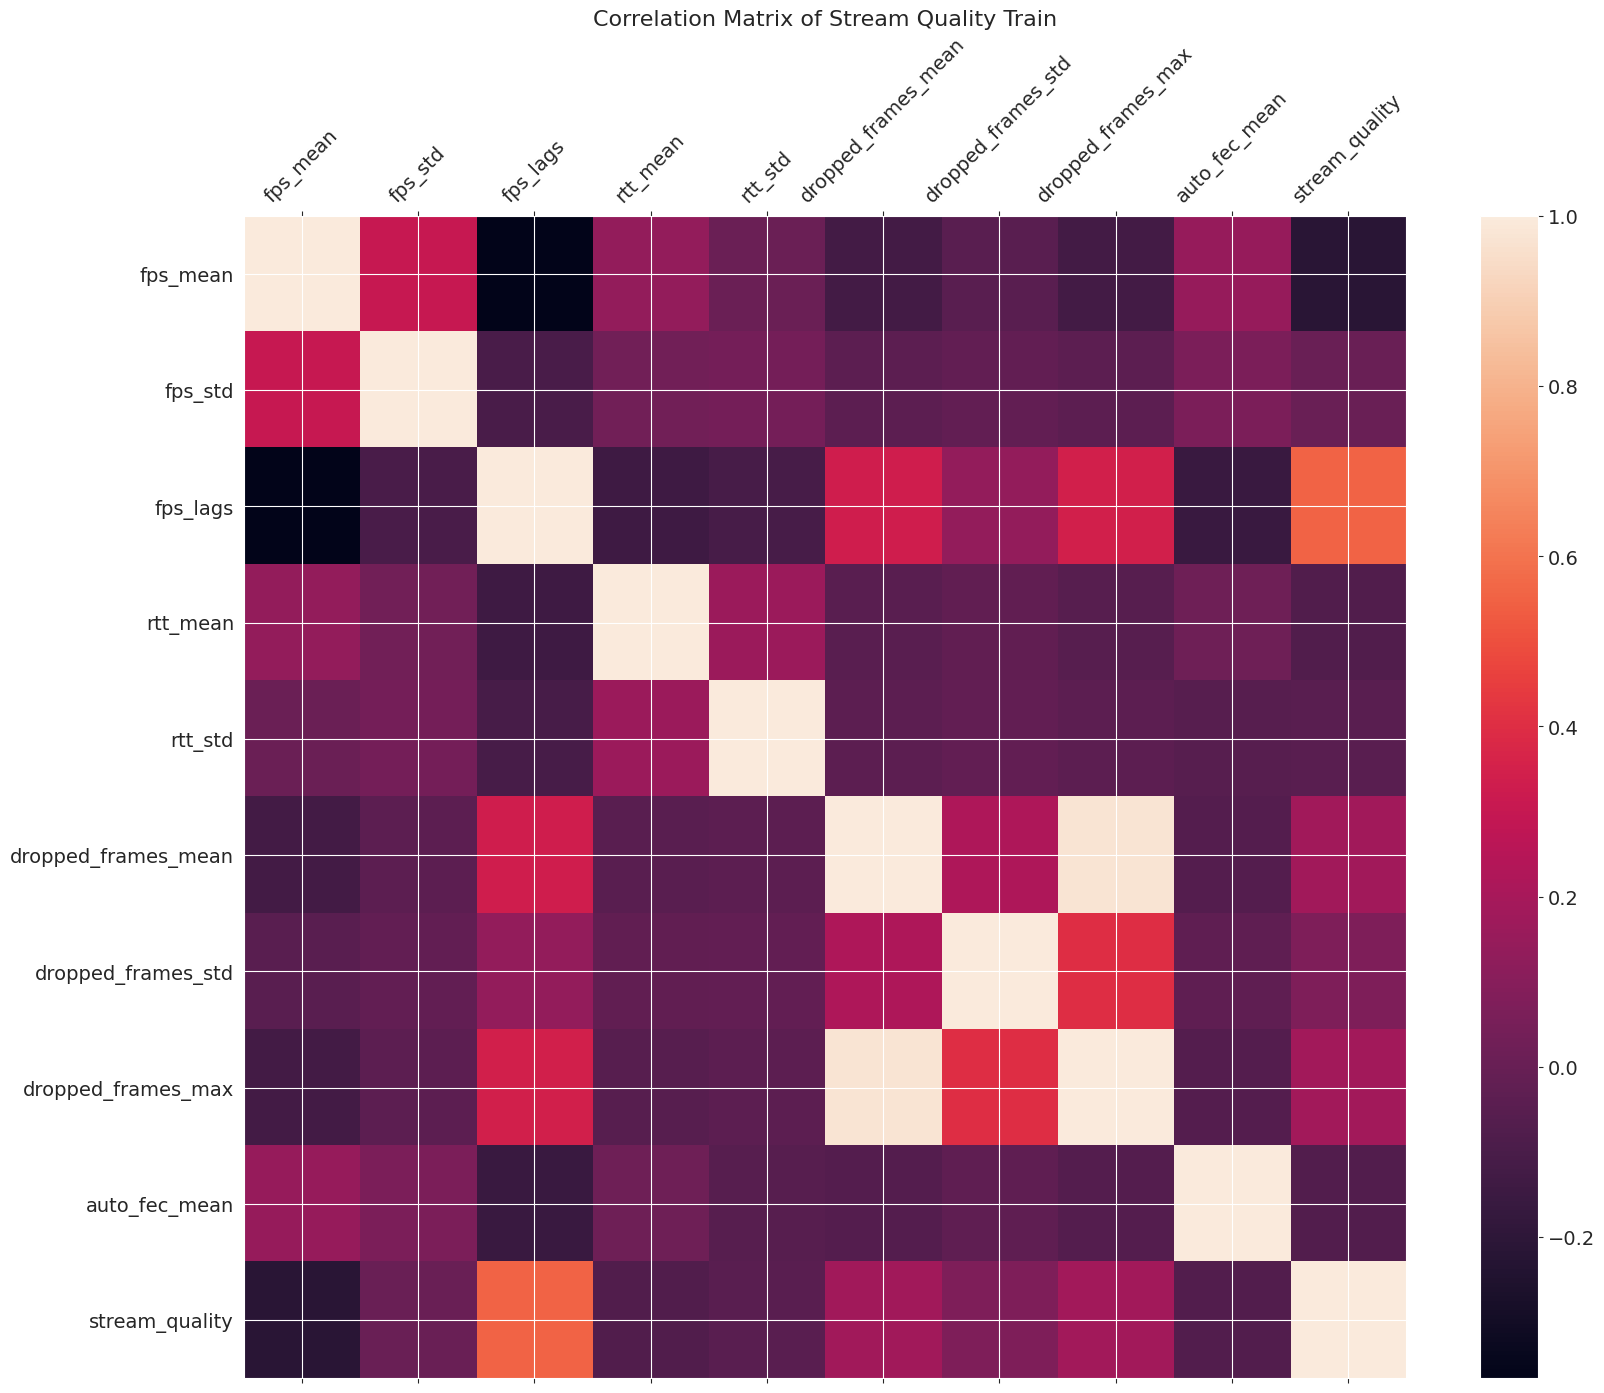

In [55]:
# Plot the correlation Matrix of the Stream Quality train
f = plt.figure(figsize=(19, 15))
plt.matshow(stream_quality.corr(), fignum=f.number)
plt.xticks(range(stream_quality.select_dtypes(['number']).shape[1]), stream_quality.select_dtypes(['number']).columns, fontsize=14,
               rotation=45)
plt.yticks(range(stream_quality.select_dtypes(['number']).shape[1]), stream_quality.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Stream Quality Train', fontsize=16)
plt.show()

In [34]:
stream_quality.describe()

fps_mean        fps_std       fps_lags       rtt_mean  \
count  406572.000000  406572.000000  406572.000000  406572.000000   
mean       34.497561       2.285486       0.183151      54.314400   
std        11.625494       3.708531       1.099384     133.872062   
min         0.000000       0.000000       0.000000       0.000000   
25%        28.300000       0.316228       0.000000      14.100000   
50%        30.000000       0.994429       0.000000      32.300000   
75%        43.000000       2.590581       0.000000      57.100000   
max       127.100000     312.540842      10.000000   12898.400000   

             rtt_std  dropped_frames_mean  dropped_frames_std  \
count  406572.000000         4.065720e+05        4.065720e+05   
mean       19.525019         1.730432e+06        1.378279e+05   
std       156.364337         4.930091e+07        9.229776e+06   
min         0.000000         0.000000e+00        0.000000e+00   
25%         0.699206         0.000000e+00        0.000000e+00   
50%         1.490712         0.000000e+00        0.000000e+00   
75%         5.334375         0.000000e+00        0.000000e+00   
max     40721.933293         2.097289e+09        9.963751e+08   

       dropped_frames_max  auto_fec_mean  stream_quality  
count        4.065720e+05  406572.000000   406572.000000  
mean         1.893339e+06      51.413536        0.068460  
std          5.241003e+07      34.836045        0.252534  
min          0.000000e+00       0.000000        0.000000  
25%          0.000000e+00      50.000000        0.000000  
50%          0.000000e+00      50.000000        0.000000  
75%          0.000000e+00      50.000000        0.000000  
max          2.097289e+09     250.000000        1.000000

In [35]:
stream_quality_test.describe()

fps_mean        fps_std       fps_lags       rtt_mean  \
count  243596.000000  243596.000000  243596.000000  243596.000000   
mean       34.655252       2.261398       0.103253      55.273762   
std        10.986547       3.554645       0.615878     163.872966   
min         0.000000       0.000000       0.000000       0.000000   
25%        28.600000       0.316228       0.000000      14.600000   
50%        30.000000       0.994429       0.000000      30.600000   
75%        42.500000       2.547330       0.000000      59.300000   
max        84.600000     150.766044      10.000000   13456.800000   

             rtt_std  dropped_frames_mean  dropped_frames_std  \
count  243596.000000         2.435960e+05       243596.000000   
mean       20.683917         3.153827e+04            1.573091   
std       146.242876         5.882144e+06           70.320152   
min         0.000000         0.000000e+00            0.000000   
25%         0.707107         0.000000e+00            0.000000   
50%         1.699673         0.000000e+00            0.000000   
75%         6.624030         0.000000e+00            0.000000   
max      9561.738301         1.097304e+09        34537.342512   

       dropped_frames_max  auto_fec_mean  stream_quality  
count        2.435960e+05  243596.000000   243596.000000  
mean         3.154188e+04      49.408948        0.064426  
std          5.882144e+06      35.649026        0.245511  
min          0.000000e+00       0.000000        0.000000  
25%          0.000000e+00      50.000000        0.000000  
50%          0.000000e+00      50.000000        0.000000  
75%          0.000000e+00      50.000000        0.000000  
max          1.097304e+09     250.000000        1.000000

#### 5. Detecting and Removing the Outliers

In [36]:
def remove_outliers(x, coln):
    """Detects and removes the outliers from the dataframe
    :param x: Dataframe
    :param coln: Feature/Column name from the dataframe"""
    q1 = x[coln].quantile(0.25)
    q3 = x[coln].quantile(0.75)
    iqr = q3-q1     # Inter quartile range
    thresh_low = q1-1.5*iqr
    thresh_high = q3+1.5*iqr
    df_out = x.loc[(x[coln] > thresh_low) & (x[coln] < thresh_high)]
    return df_out

In [37]:
# Remove Outliers from Train set

features = list()
for col in stream_quality.drop(['stream_quality'], axis=1).columns:
    features.append(col)
print("All the features in training dataframe : \n", features)

print("\nDataframe shape before removing outliers: \n", stream_quality.shape)
stream_quality = remove_outliers(stream_quality, features[1])   # removes fps_std outliers
stream_quality = remove_outliers(stream_quality, features[3])   # removes rtt_mean outliers
stream_quality = remove_outliers(stream_quality, features[4])   # removes rtt_std outliers
print("\nDataframe shape after removing outliers: \n", stream_quality.shape)


All the features in training dataframe : 
 ['fps_mean', 'fps_std', 'fps_lags', 'rtt_mean', 'rtt_std', 'dropped_frames_mean', 'dropped_frames_std', 'dropped_frames_max', 'auto_bitrate_state', 'auto_fec_state', 'auto_fec_mean']

Dataframe shape before removing outliers: 
 (406572, 12)

Dataframe shape after removing outliers: 
 (290582, 12)


In [38]:
# Remove Outliers from Test set
features = list()
for col in stream_quality_test.drop(['stream_quality'], axis=1).columns:
    features.append(col)
print("All the features in stream quality test dataframe : ", features)

print("stream quality test shape before removing outliers: ", stream_quality_test.shape)
stream_quality_test = remove_outliers(stream_quality_test, features[1])  # removes fps_std outliers
stream_quality_test = remove_outliers(stream_quality_test, features[3])  # removes rtt_mean outliers
stream_quality_test = remove_outliers(stream_quality_test, features[4])  # removes rtt_std outliers
print("stream quality test shape after removing outliers: ", stream_quality_test.shape)


All the features in stream quality test dataframe :  ['fps_mean', 'fps_std', 'fps_lags', 'rtt_mean', 'rtt_std', 'dropped_frames_mean', 'dropped_frames_std', 'dropped_frames_max', 'auto_bitrate_state', 'auto_fec_state', 'auto_fec_mean']
stream quality test shape before removing outliers:  (243596, 12)
stream quality test shape after removing outliers:  (177815, 12)


#### 6. Splitting the targets from the train and test dataframe

In [39]:
# Splitting the 'stream_quality' column from the train_data
# and storing it in y_train, y_test respectively
# We Get the x_train, y_train and x_test, y_test data

x_train = stream_quality.drop(['stream_quality'], axis=1)
y_train = stream_quality.loc[:, 'stream_quality']
x_test = stream_quality_test.drop(columns=['stream_quality'])  # Can use the columns arg to avoid writing axis = 1
y_test = stream_quality_test.loc[:, 'stream_quality']

In [40]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(290582, 11) (290582,) (177815, 11) (177815,)


#### 7. Data Preprocessing (Encoding, Imputing, Feature Selection, Scaling...etc)

In [41]:
def encode_one_hot(x):
    """Encodes the Dataframe with the OneHotEncoder
    :param x: X Dataframe which needs to be Encoded, Fitted and Transformed"""
    category_features = x.select_dtypes(include=['object']).columns.tolist()
    print("\nCategorical Features : ", category_features)
    encoder = OneHotEncoder(cols=category_features)
    encoder.fit(x)
    x = encoder.transform(x)
    # print("\nEncoded bit rate x_train : \n", x)
    return x

def impute_simple(x, strategy='mean'):
    """Imputes the Dataframe with the SimpleImputer
    :param x: X Dataframe which needs to be Imputed, Fitted and Transformed
    :param strategy: The strategy by which the dataframe needs to be imputed"""

    imputer = SimpleImputer(strategy='mean')
    imputer.fit(x)
    x = pd.DataFrame(imputer.transform(x), columns=x.columns)
    # print("\nImputed Bit Rate : \n", x)
    return x

def scale_std(x):
    """Scales the Dataframe with the RobustScaler
    :param x: X Dataframe which needs to be Scaled, Fitted and Transformed"""

    scaler = RobustScaler()
    scaler.fit(x)
    x = pd.DataFrame(scaler.transform(x), columns=x.columns)
    # print("\nScaled Bit Rate : \n", x)
    return x

def data_preprocessing(x):
    """Data preprocessing - Encoding, Imputing, Feature Selection, Scaling of the Dataframe
    :param x: X Dataframe which needs to be Encoded, Imputed,
     Scaled, Fitted and Transformed"""

    # Encoding the data with the One Hot Encoder x_train
    x = encode_one_hot(x)

    # Imputing the data with the mean x_train
    x = impute_simple(x, strategy='mean')

    # Feature Selection new technique
    print("Shape of dataframe before Feature Selection : ", x.shape)
    x = x.replace(0, np.nan)
    x = x.dropna(axis=1, thresh=0.05*len(x))
    print("Removed columns with 95% zeros")
    print("Shape of dataframe after Feature Selection : ", x.shape)
    x = x.replace(np.nan, 0)

    # Scaling the data with Robust Scaler x_train
    x = scale_std(x)
    return x

In [42]:
# Data preprocessing - Encoding, Imputing, Feature Selection, Scaling
print("\nData-preprocessing of x_train:", end="")
x_train = data_preprocessing(x_train)
print("\nData-preprocessing of x_test:", end="")
x_test = data_preprocessing(x_test)


Data-preprocessing of x_train:
Categorical Features :  ['auto_bitrate_state', 'auto_fec_state']
Shape of dataframe before Feature Selection :  (290582, 14)
Removed columns with 95% zeros
Shape of dataframe after Feature Selection :  (290582, 9)

Data-preprocessing of x_test:
Categorical Features :  ['auto_bitrate_state', 'auto_fec_state']
Shape of dataframe before Feature Selection :  (177815, 14)
Removed columns with 95% zeros
Shape of dataframe after Feature Selection :  (177815, 9)


In [43]:
x_train.head()

fps_mean   fps_std  rtt_mean   rtt_std  auto_bitrate_state_1  \
0 -0.402878 -0.101139  2.129450  3.182469                   0.0   
1  0.000000 -0.375000  1.834951 -0.595164                   0.0   
2  0.000000 -0.375000  1.834951 -0.595164                   0.0   
3  0.000000 -0.375000  1.834951 -0.595164                   0.0   
4  0.000000 -0.375000  1.834951 -0.595164                   0.0   

   auto_bitrate_state_2  auto_fec_state_1  auto_fec_state_2  auto_fec_mean  
0                   0.0               0.0               0.0            0.0  
1                   0.0               0.0               0.0            0.0  
2                   0.0               0.0               0.0            0.0  
3                   0.0               0.0               0.0            0.0  
4                   0.0               0.0               0.0            0.0

In [44]:
x_test.head()

fps_mean   fps_std  rtt_mean   rtt_std  auto_bitrate_state_1  \
0 -0.008197 -0.216741  0.984424 -0.098810                   0.0   
1  0.000000 -0.395706  0.984424 -0.098810                   0.0   
2  0.000000 -0.395706  1.015576  0.975976                   0.0   
3 -0.008197 -0.216741  1.090343  1.568624                   0.0   
4  0.000000 -0.395706  0.975078  0.042026                   0.0   

   auto_bitrate_state_3  auto_fec_state_1  auto_fec_state_2  auto_fec_mean  
0                   0.0               0.0               0.0            0.0  
1                   0.0               0.0               0.0            0.0  
2                   0.0               0.0               0.0            0.0  
3                   0.0               0.0               0.0            0.0  
4                   0.0               0.0               0.0            0.0

Features Selected from the data preprocessing are:

In [45]:
# Selected Features after data preprocessing stage
selected_features = list()
for col in x_train.columns:
    selected_features.append(col)
print("\nSelected Features : ", selected_features)


Selected Features :  ['fps_mean', 'fps_std', 'rtt_mean', 'rtt_std', 'auto_bitrate_state_1', 'auto_bitrate_state_2', 'auto_fec_state_1', 'auto_fec_state_2', 'auto_fec_mean']


In [46]:
def pair_plot(x, suptitle_label='Pair Plot of X data'):
    """Plots a Pair Plot from a Dataframe
    :param x: X Dataframe which needs to be pair-plotted
    :param suptitle_label: It's a label for the plot"""

    plt.figure()
    sns.pairplot(pd.DataFrame(x))
    plt.suptitle(suptitle_label)
    plt.show()
    return None

<Figure size 640x480 with 0 Axes>

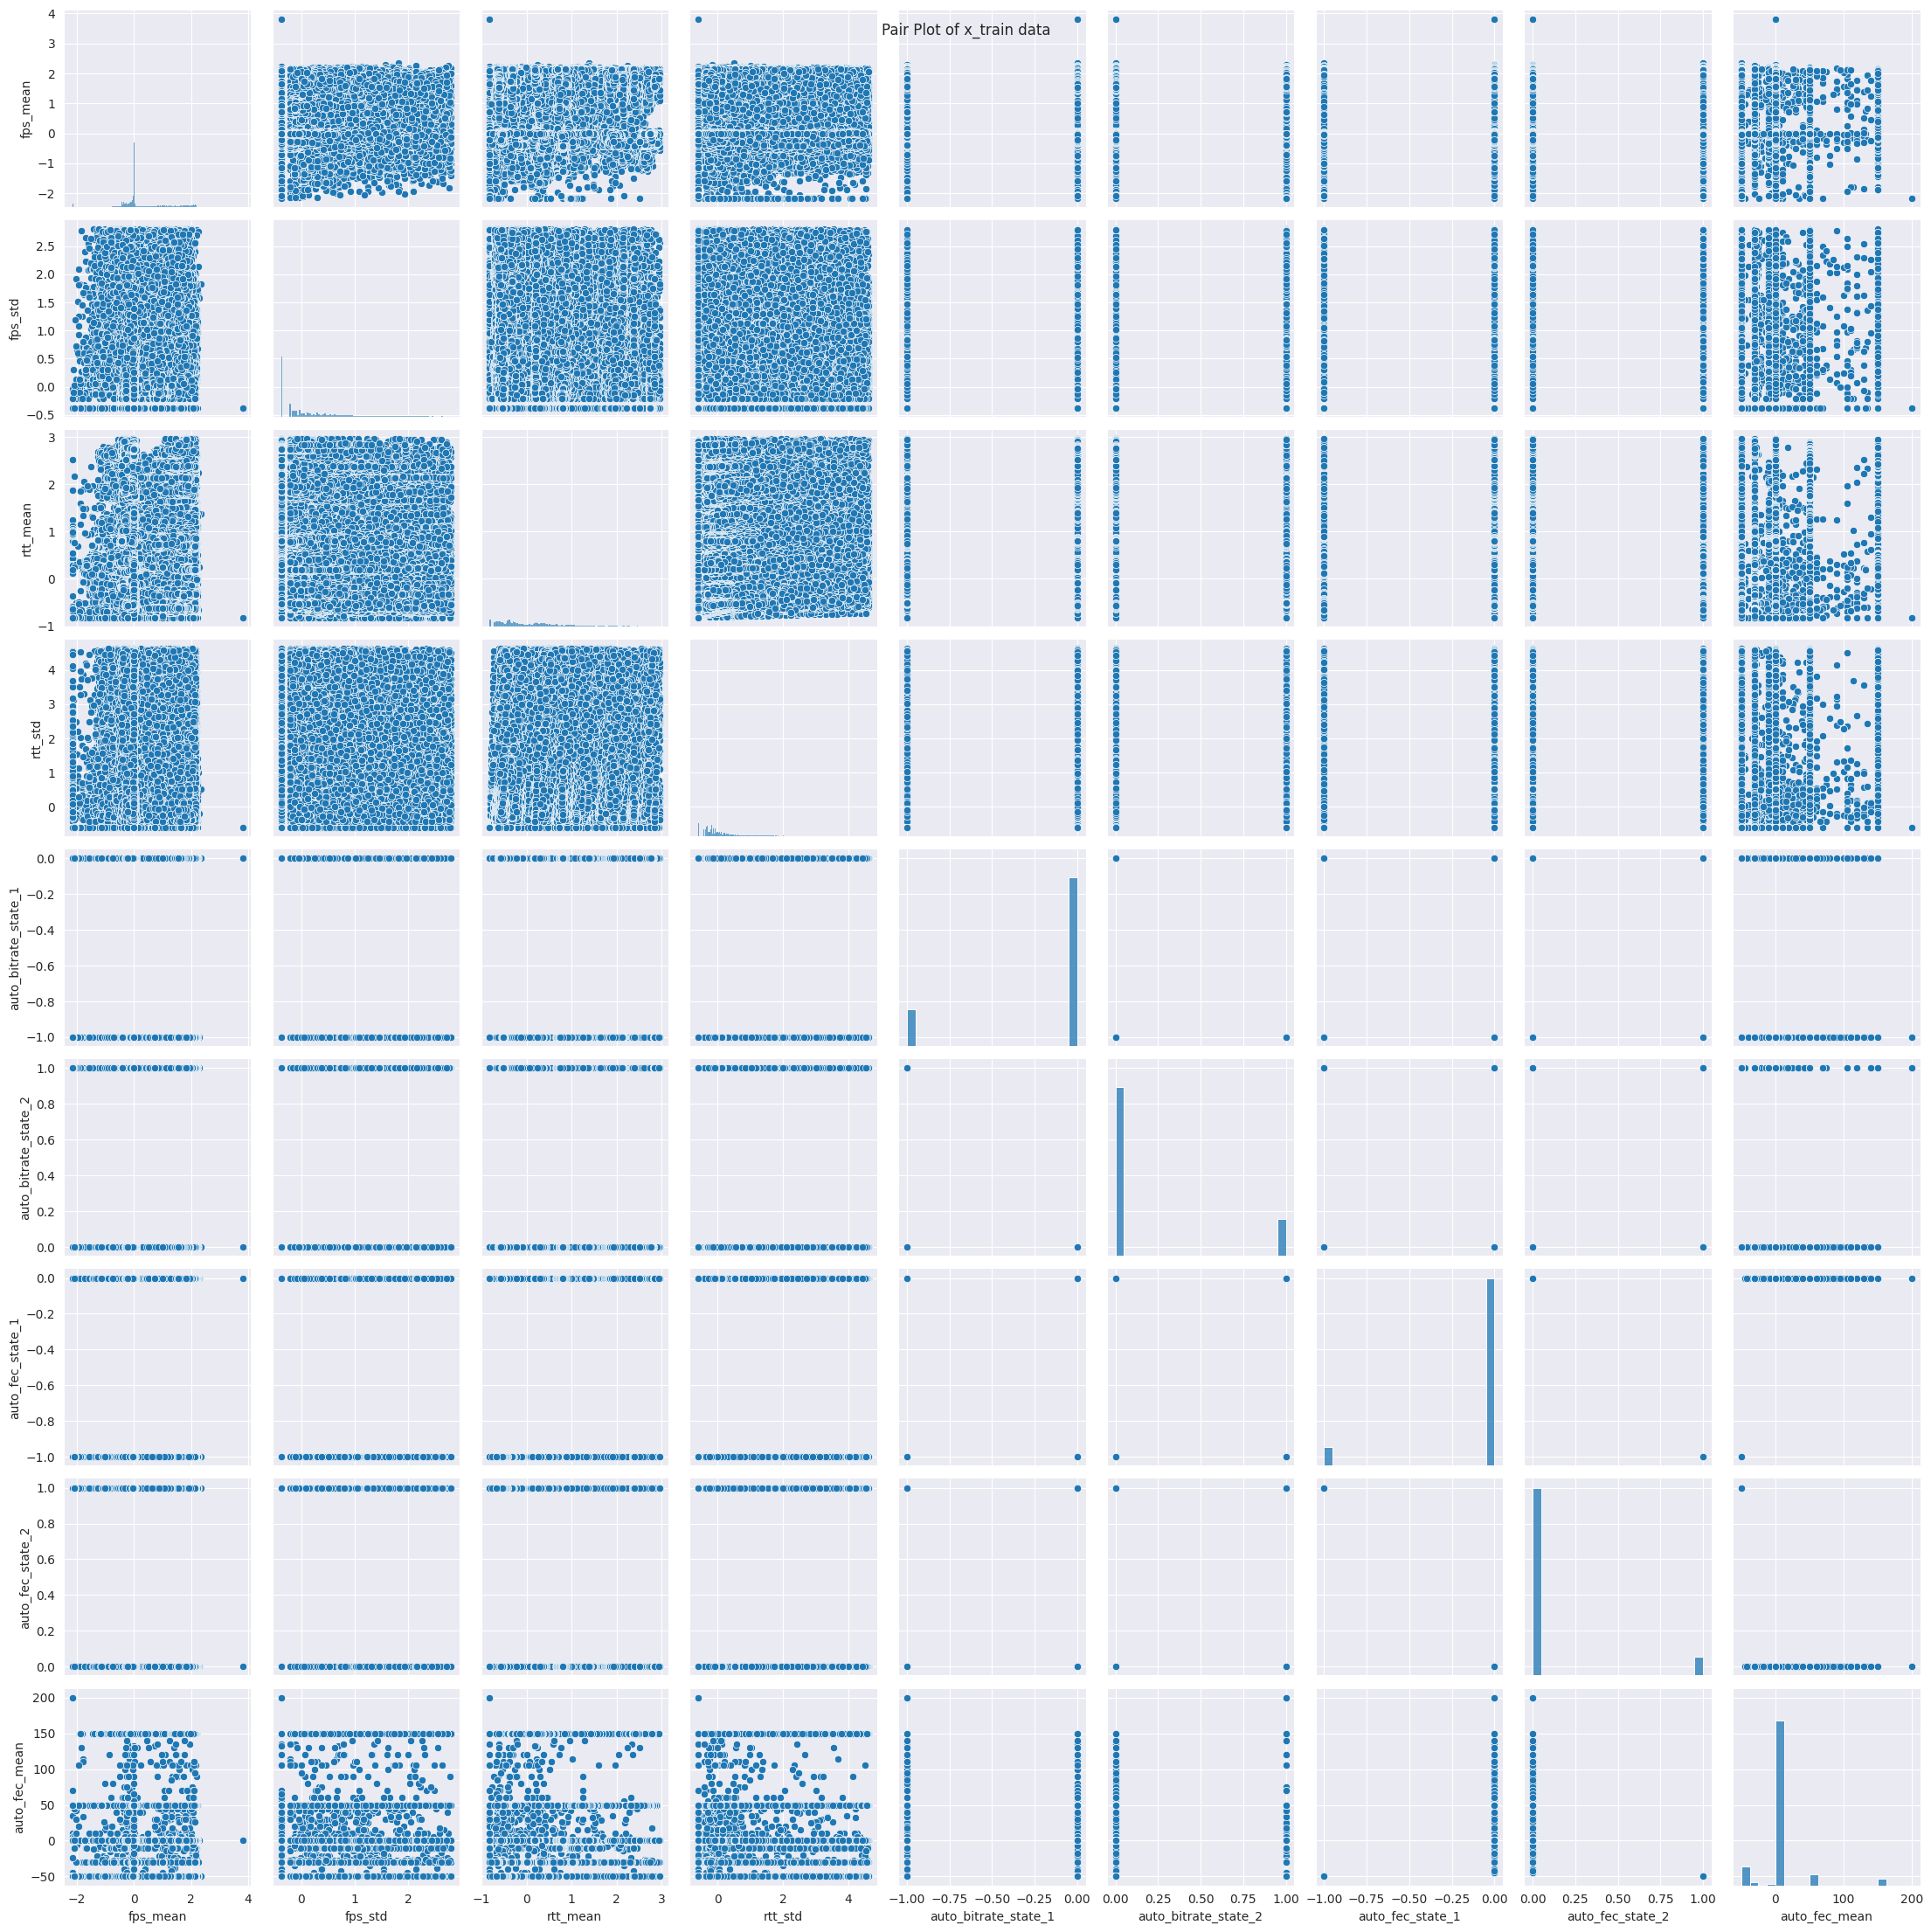

In [47]:
# Pair Plot of x_train after preprocessing of the data
# This takes latest 4 minutes to execute
pair_plot(x_train, suptitle_label="Pair Plot of x_train data")

#### 8. Creating Validation set from the Training set

In [48]:
# Split the x_train to two parts x_val and x_train
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=0)
y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=0)
print(f"\nShape of x_train : {x_train.shape}\nShape of x_val : {x_val.shape}")
print(f"Shape of y_train : {y_train.shape}\nShape of y_val : {y_val.shape}")


Shape of x_train : (232465, 9)
Shape of x_val : (58117, 9)
Shape of y_train : (232465,)
Shape of y_val : (58117,)


#### 9. PCA Visualization of reduced x_train with y_train


Shape of x_train before PCA (232465, 9)


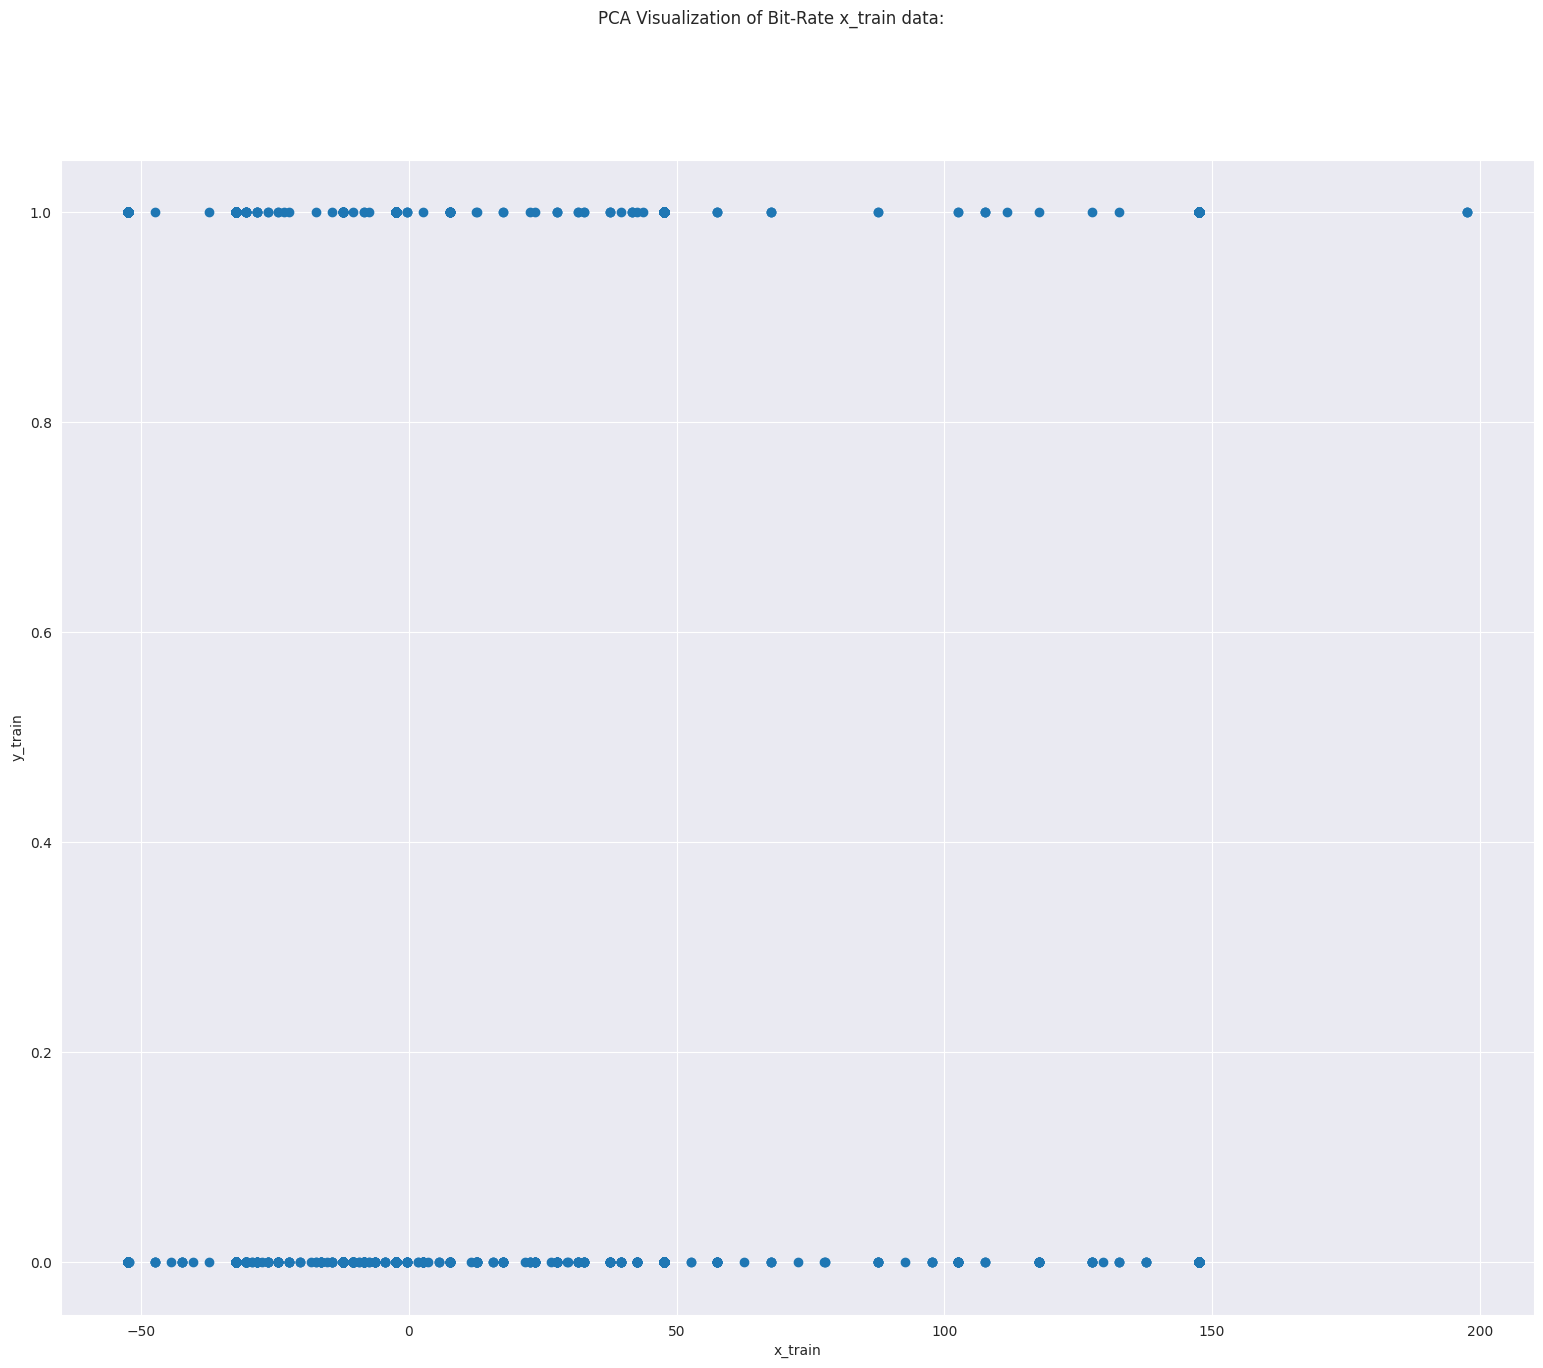


Shape of x_train after PCA (232465, 1)


In [49]:
# PCA Visualization of the Complete Dataframe x_train in 2dimensional graphs
print("\nShape of x_train before PCA", x_train.shape)
dimes_reducer = PCA(n_components=1)
x_train_reduced = dimes_reducer.fit_transform(x_train)
f = plt.figure(figsize=(19, 15))
plt.scatter(x_train_reduced[:, 0], y_train, marker='o')    # x_train_reduced[:, 1]
plt.suptitle("PCA Visualization of Bit-Rate x_train data: ")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()
print("\nShape of x_train after PCA", x_train_reduced.shape)

### 10. Logistic Regression with L2 Regularization

In [50]:
def print_metrics(y_true, y_predict):
    """Prints the Metrics such as Accuracy, Precision, Recall, F1 Score of the
    true and predicted values of a particular classifier model
    :param y_true: True target dataframe
    :param y_predict: Predicted target dataframe"""

    p, r, f1, _ = precision_recall_fscore_support(y_true, y_predict, average='macro')
    print("Accuracy, Precision, Recall and F1_score are: ")
    print("Precision : ", p)
    print("Recall : ", r)
    print("F1 score : ", f1)
    a = accuracy_score(y_true, y_predict)
    print("Accuracy : ", a)
    print("\nClassification Report:")
    target_names = [ 'Class 0', 'Class 1',]
    print(classification_report(y_true, y_predict, target_names=target_names))
    return None

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- auto_bitrate_state_3
Feature names seen at fit time, yet now missing:
- auto_bitrate_state_2

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- auto_bitrate_state_3
Feature names seen at fit time, yet now missing:
- auto_bitrate_state_2

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- auto_bitrate_state_3
Feature names seen at fit time, yet 


Performance Metrics of Logistic Regression with L2 Regularization:
Accuracy, Precision, Recall and F1_score are: 
Precision :  0.9532232663999389
Recall :  0.5179599349355474
F1 score :  0.5264140694685956
Accuracy :  0.9675449202823159

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98    171843
     Class 1       0.94      0.04      0.07      5972

    accuracy                           0.97    177815
   macro avg       0.95      0.52      0.53    177815
weighted avg       0.97      0.97      0.95    177815



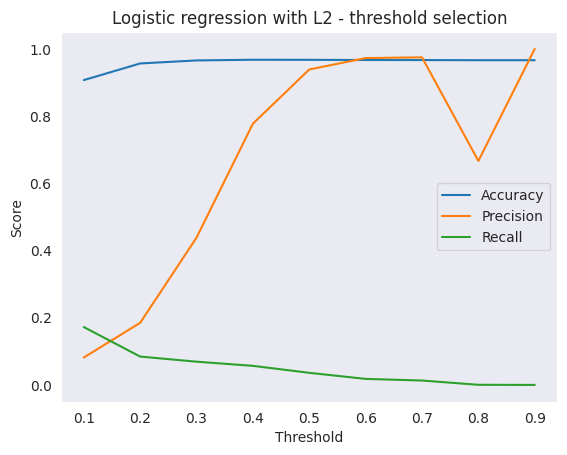

In [51]:
# Logistic Regression Model with L2 Regularization
logistic_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500000, random_state=0).fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)
y_pred_prob = logistic_model.predict_proba(x_test)

print("\nPerformance Metrics of Logistic Regression with L2 Regularization:")
print_metrics(y_true=y_test, y_predict=y_pred)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_pred_prob = logistic_model.predict_proba(x_test)
vals = [[], [], []]
for i in thresholds:
    y_test_pred_thr = np.where(y_pred_prob[:, 1] > i, 1, 0)
    vals[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    vals[1].append(metrics.precision_score(y_test, y_test_pred_thr, zero_division=1))
    vals[2].append(metrics.recall_score(y_test, y_test_pred_thr))

plt.plot(thresholds, vals[0], label='Accuracy')
plt.plot(thresholds, vals[1], label='Precision')
plt.plot(thresholds, vals[2], label='Recall')
plt.title('Logistic regression with L2 - threshold selection')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


### 11. Balancing - Logistic Regression with OverSampling

In [52]:
# Logistic Regression with Over sampling
o_sampler = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = o_sampler.fit_resample(x_train, y_train)
print("y_train count : \n", y_train.value_counts())
print("y_over count : \n", y_over.value_counts())

logistic_samp_model = LogisticRegression().fit(x_over.values, y_over)
pred_over = logistic_samp_model.predict(x_test)
print("\nPerformance Metrics of Logistic Regression with Over Sampling:")
print_metrics(y_true=y_test, y_predict=pred_over)

y_train count : 
 0    221288
1     11177
Name: stream_quality, dtype: int64
y_over count : 
 0    221288
1    110644
Name: stream_quality, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Performance Metrics of Logistic Regression with Over Sampling:
Accuracy, Precision, Recall and F1_score are: 
Precision :  0.5329295821471148
Recall :  0.5590941899882687
F1 score :  0.5398718932369094
Accuracy :  0.9161544301661839

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.94      0.96    171843
     Class 1       0.10      0.18      0.12      5972

    accuracy                           0.92    177815
   macro avg       0.53      0.56      0.54    177815
weighted avg       0.94      0.92      0.93    177815



### 12. Decision Tree Classifier

In [53]:
# DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = decision_tree_model.predict(x_test)
print("\nPerformance Metrics of Decision Tree Classifier:")
print_metrics(y_true=y_test, y_predict=y_pred_dt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- auto_bitrate_state_3
Feature names seen at fit time, yet now missing:
- auto_bitrate_state_2

  warnings.warn(message, FutureWarning)



Performance Metrics of Decision Tree Classifier:
Accuracy, Precision, Recall and F1_score are: 
Precision :  0.5272611910471026
Recall :  0.5480271240825872
F1 score :  0.5325657807558614
Accuracy :  0.9158507437505272

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.94      0.96    171843
     Class 1       0.08      0.15      0.11      5972

    accuracy                           0.92    177815
   macro avg       0.53      0.55      0.53    177815
weighted avg       0.94      0.92      0.93    177815



### 13. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
random_forest_model=RandomForestClassifier(n_estimators=100)
random_forest_model.fit(x_train,y_train)
y_pred_rand=random_forest_model.predict(x_test)
print("\nPerformance Metrics of Random Forest Classifier")
print_metrics(y_true=y_test, y_predict=y_pred_rand)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- auto_bitrate_state_3
Feature names seen at fit time, yet now missing:
- auto_bitrate_state_2

  warnings.warn(message, FutureWarning)



Performance Metrics of Random Forest Classifier
Accuracy, Precision, Recall and F1_score are: 
Precision :  0.7480713256280555
Recall :  0.5376375499592985
F1 score :  0.5592249466293553
Accuracy :  0.9666844754379552

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98    171843
     Class 1       0.53      0.08      0.14      5972

    accuracy                           0.97    177815
   macro avg       0.75      0.54      0.56    177815
weighted avg       0.95      0.97      0.95    177815



## End of the Classification task